In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [87]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import Lasso,Ridge

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("C:\\Users\\cheta\\OneDrive\\Desktop\\Machine_learning\\Jamboree_Admission.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

#### Droping the irrelevant column ("Serial No) 

In [5]:
df.drop(['Serial No.'],axis='columns',inplace=True)

In [6]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [7]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [19]:
df.rename({
    "LOR ":"LOR",
    "Chance of Admit ": "Chance of Admit"
}, axis = 1, inplace=True)

In [21]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<Figure size 720x576 with 0 Axes>

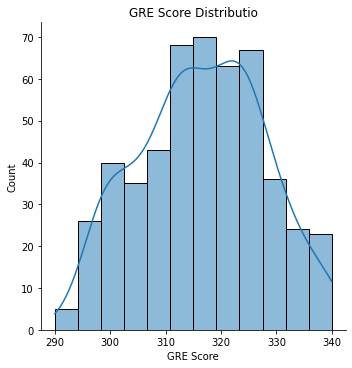

In [16]:
plt.figure(figsize=(10,8))
sns.displot(df['GRE Score'],kde="ecdf")
plt.title("GRE Score Distributio")
plt.show()3

<Figure size 720x576 with 0 Axes>

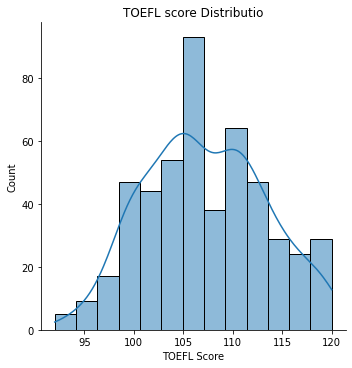

In [17]:
plt.figure(figsize=(10,8))
sns.displot(df['TOEFL Score'],kde="ecdf")
plt.title("TOEFL score Distributio")
plt.show()

<Figure size 720x576 with 0 Axes>

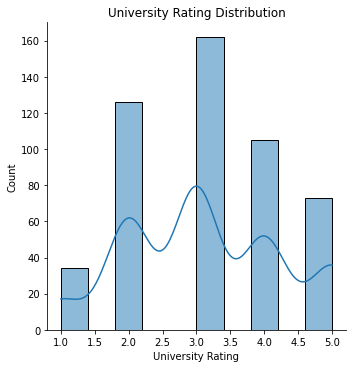

In [23]:
plt.figure(figsize=(10,8))
sns.displot(df['University Rating'],kde="ecdf")
plt.title("University Rating Distribution")
plt.show()

<Figure size 720x576 with 0 Axes>

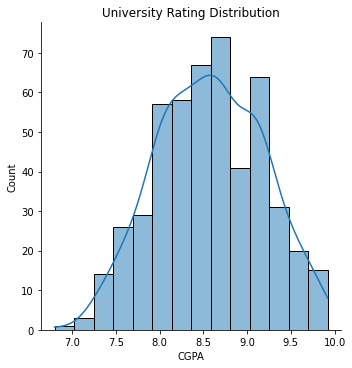

In [24]:
plt.figure(figsize=(10,8))
sns.displot(df['CGPA'],kde="ecdf")
plt.title("University Rating Distribution")
plt.show()

### Understanding the relation between different factores are resposible for Graduation Addmission

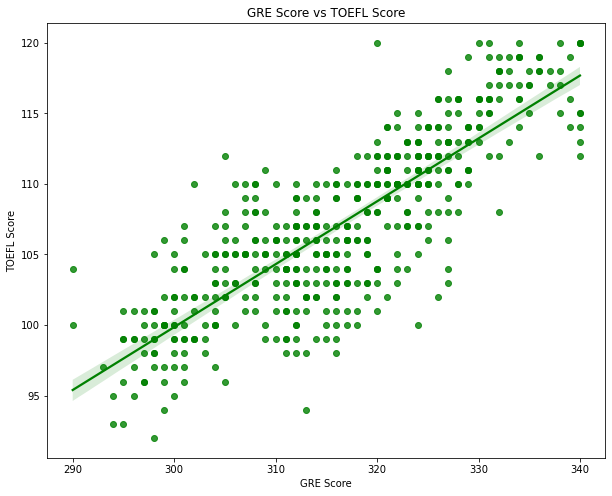

In [26]:
plt.figure(figsize=(10,8))
sns.regplot(x='GRE Score',y='TOEFL Score',data=df,color='g')
plt.title("GRE Score vs TOEFL Score")
plt.show()

#### People with higher GRE score have Higher TOEFL Score which is justified because both TOEFL and GRE have a verbal section which is although not similar or relatable

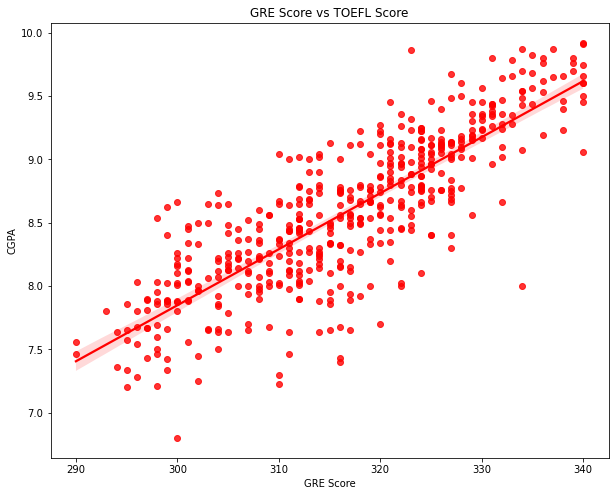

In [29]:
plt.figure(figsize=(10,8))
sns.regplot(x='GRE Score',y='CGPA',data=df,color='r')
plt.title("GRE Score vs TOEFL Score")
plt.show()

### People with higher CGPA have the higher GRE Score may be they are smart or hard working 

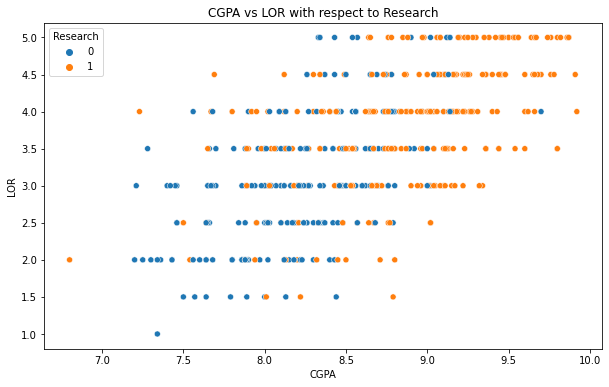

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='CGPA',y='LOR',data=df,hue='Research')
plt.title("CGPA vs LOR with respect to Research")
plt.show()

### LOR's are clearly seen that they aren't dependent on the CGPA (academics) it is purely having the research experience 

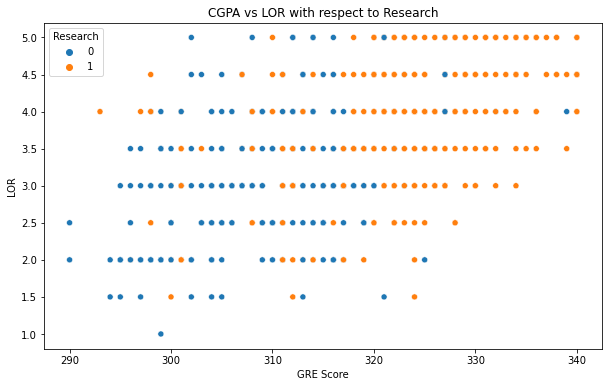

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='GRE Score',y='LOR',data=df,hue='Research')
plt.title("CGPA vs LOR with respect to Research")
plt.show()

### GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE score


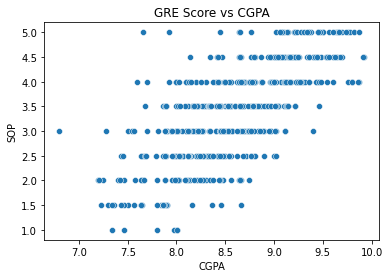

In [35]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=df)
plt.title("GRE Score vs CGPA")
plt.show()

#### CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working so they have good things to say in their SOP which might explain the slight move towards higher CGPA as along with good SOPs 

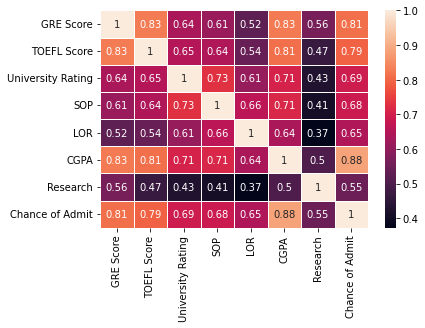

In [37]:
corr = df.corr()
sns.heatmap(corr, linewidth=0.5, annot=True)
plt.show()

In [43]:
X = df.drop(['Chance of Admit'],axis=1)
y = df['Chance of Admit']

In [75]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [76]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
250,320,104,3,3.0,2.5,8.57,1
354,297,98,2,2.5,3.0,7.67,0
103,317,104,2,4.5,4.0,8.47,0
1,324,107,4,4.0,4.5,8.87,1
290,307,105,2,2.5,3.0,7.65,0


In [77]:
X_train_columns = X_train.columns
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_train_std

array([[ 0.34742072, -0.50456401, -0.08787496, ..., -1.04667407,
        -0.00328489,  0.94169658],
       [-1.73755683, -1.50700906, -0.96662451, ..., -0.5043559 ,
        -1.51938697, -1.06191317],
       [ 0.07546712, -0.50456401, -0.96662451, ...,  0.58028044,
        -0.17174067, -1.06191317],
       ...,
       [ 1.79783988,  0.83202939,  1.66962415, ...,  1.66491678,
         2.00133897,  0.94169658],
       [-1.82820803, -2.00823158, -0.96662451, ..., -1.58899224,
        -1.73837949,  0.94169658],
       [ 0.07546712,  0.49788104, -0.08787496, ...,  1.12259861,
         0.90637636,  0.94169658]])

In [78]:
X_train = pd.DataFrame(X_train_std, columns=X_train_columns)

In [79]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.347421,-0.504564,-0.087875,-0.369057,-1.046674,-0.003285,0.941697
1,-1.737557,-1.507009,-0.966625,-0.864436,-0.504356,-1.519387,-1.061913
2,0.075467,-0.504564,-0.966625,1.117079,0.580280,-0.171741,-1.061913
3,0.710026,-0.003341,0.790875,0.621701,1.122599,0.502082,0.941697
4,-0.831045,-0.337490,-0.966625,-0.864436,-0.504356,-1.553078,-1.061913
...,...,...,...,...,...,...,...
395,1.888491,1.834474,0.790875,1.117079,1.122599,1.816038,0.941697
396,-0.468440,-0.337490,-0.966625,-0.369057,-1.588992,-0.761336,0.941697
397,1.797840,0.832029,1.669624,1.612458,1.664917,2.001339,0.941697
398,-1.828208,-2.008232,-0.966625,-0.369057,-1.588992,-1.738379,0.941697


In [80]:
y_train.head()

250    0.74
354    0.59
103    0.57
1      0.76
290    0.58
Name: Chance of Admit, dtype: float64

In [81]:
models = {
    'Linear Regression ': LinearRegression(),
    'Lasso Regression ': Lasso(alpha=0.1),
    'Ridge Regression ':Ridge(alpha=1.0)  
}


## Results without removing Multi-Colinearity

In [82]:
for name,model in models.items():
    model.fit(X_train,y_train.values)
    predictions = model.predict(std.transform(x_test))
    print(f"name={name}:{np.sqrt(mean_squared_error(y_test,predictions))}")

name=Linear Regression :0.06176759114137455
name=Lasso Regression :0.13313047657288823
name=Ridge Regression :0.06179342448654139


C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\cheta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


# Linear Regression Using Stats model Library

#### R-squared reflects the fit of the model. R-squared values range from 0-1, where the higher value indicates the better fit of the model 
#### std error reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
#### P > |t| is the P-Value, a p-value of less than 0.05 is considered to be statistically significant
#### Confidence Interval represents the range in which out coefficients are likely to fall 

In [84]:
X_train = sm.add_constant(X_train)
sm_model = sm.OLS(y_train.values,X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     248.8
Date:                Sat, 10 Dec 2022   Prob (F-statistic):          5.92e-140
Time:                        15:17:30   Log-Likelihood:                 564.01
No. Observations:                 400   AIC:                            -1112.
Df Residuals:                     392   BIC:                            -1080.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7195      0.00

## Selecting the features for the model Using Variance Inflation Factor (VIF) 

In [88]:
def calculate_vif(dataFrame,col):
    df1 = dataFrame.drop(col,axis=1)
    vif = pd.DataFrame()
    vif['Features'] = dataFrame.columns
    vif['VIF'] = [variance_inflation_factor(dataFrame.values,i) for i in range(dataFrame.shape[1])]
    return vif

In [89]:
calculate_vif(X_train,[])

,Features,VIF
0,const,1.000000
1,GRE Score,4.195648
2,TOEFL Score,3.607068
3,University Rating,2.625966
4,SOP,2.912335
5,LOR,2.041494
6,CGPA,4.597883
7,Research,1.466092


## VIF value for the features looks fine, we can go a head with predictions

In [92]:
x_test_std = std.transform(x_test)

In [96]:
x_test = pd.DataFrame(x_test_std,columns = x_test.columns)

In [97]:
x_test.head(4)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.196486,-0.003341,-0.087875,-0.369057,0.037962,-0.677108,0.941697
1,-0.740394,-0.170416,-0.087875,0.126322,-1.046674,-0.609726,0.941697
2,1.888491,1.667400,1.669624,1.612458,1.664917,2.186640,0.941697
3,-1.193650,-1.339935,-0.087875,-1.359815,-1.046674,-1.536233,-1.061913


In [98]:
x_test = sm.add_constant(x_test)

In [100]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [103]:
lr.score(X_train,y_train)

0.8162839948595209

In [104]:
pred = lr.predict(x_test)
pred

array([0.68239117, 0.65344864, 0.98832235, 0.53234826, 0.44136421,
       0.8267187 , 0.66005213, 0.85350159, 0.63968158, 0.7166679 ,
       0.61932596, 0.62027811, 0.86625634, 0.77299805, 0.62380201,
       0.62044712, 0.52543268, 0.69134105, 0.82527501, 0.89392314,
       0.64504572, 0.78731526, 0.82410698, 0.67465911, 0.52863393,
       0.87762176, 0.63640709, 0.9339564 , 0.6488462 , 0.5185239 ,
       0.80100136, 0.83988367, 0.54334593, 0.74007499, 0.85935163,
       0.58161541, 0.81624882, 0.73537861, 0.64476076, 0.66291866,
       0.58151384, 0.57014329, 0.55463885, 0.80822155, 0.92540325,
       0.95741027, 0.93343699, 0.93333672, 0.81839482, 0.55743899,
       0.70272655, 0.84525283, 0.8765567 , 0.90361591, 0.78235229,
       0.88371405, 0.62905548, 0.93458506, 0.95369354, 0.93009518,
       0.66228451, 0.57903285, 0.78471706, 0.84410763, 0.63585814,
       0.60673112, 0.53531051, 0.78888541, 0.71868809, 0.61359719,
       0.7939897 , 0.7609681 , 0.73246798, 0.81668908, 0.51364

In [102]:
lr.score(x_test,y_test)

0.8364000051710699

## Mean Square Residuals 

In [107]:
residuals = y_test.values - pred
residuals_mean = np.mean(residuals)
residuals_mean

-0.003204271684536983

Text(0, 0.5, 'y_pred')

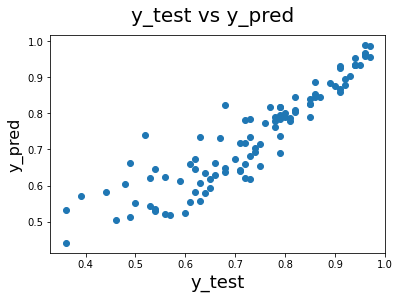

In [110]:
fig = plt.figure()
plt.scatter(y_test.values, pred)
fig.suptitle('y_test vs y_pred', fontsize=20)           
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 